# Библиотеки Python для Data Science<br>Классификация

- - -
## Содержание<a class="anchor" id="toc"></a>
* [Содержание](#toc)
* [Введение в проект](#intro)
    * [Постановка задачи](#task)
    * [Описание данных](#description)
* [Обзор данных](#overview)
    * [Тренировочные данные](#train_overview)
    * [Тестовые данные](#test_overview)
* [Приведение типов](#cast)
* [Обработка выбросов](#outliers)
* [Обработка пропусков](#gaps)
* [Анализ данных](#analysis)
* [Отбор признаков](#feature_selection)
* [Балансировка классов](#balancing)
* [Подбор моделей, получение бейзлана](#model_selection)
* [Выбор наилучшей модели, настройка гиперпараметров](#hyper)
* [Проверка качества, борьба с переобучением](#overfittig)
* [Интерпретация результатов](#interpretation)

- - -
## Введение в проект<a class="anchor" id="intro"></a>

### Постановка задачи<a class="anchor" id="task"></a>

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Описание данных<a class="anchor" id="description"></a>

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - ???
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'jpeg'
%matplotlib inline
pd.options.display.max_columns = 100

**Пути к директория и файлам**

In [2]:
TRAIN_DATASET_PATH = 'data/course_project_train.csv'
TEST_DATASET_PATH = 'data/course_project_test.csv'

**Пайплайн преобразований**

In [3]:
pipeline = []

- - - 
## Обзор данных<a class="anchor" id="overview"></a>

### Тренировочные данные<a class="anchor" id="train_overview"></a>

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df_train.shape

(7500, 17)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

**Обзор целевой переменной**

In [7]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

**Обзор количественных признаков**

In [8]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


**Обзор номинативных признаков**

In [9]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### Тестовые данные<a class="anchor" id="test_overview"></a>

In [10]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [11]:
df_test.shape

(2500, 16)

- - -
## Приведение категорийных типов<a class="anchor" id="cast"></a>

In [12]:
df_train.select_dtypes(include='object').columns

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

**Years in current job**

Данный категорийный признак, имеет регрессионную природу, поэтому мы можем привести его к целочисленным значениям

In [13]:
def cast_years(df):
    def cast(value):
        if isinstance(value, int):
            return value
        if value == "< 1 year":
            return 0
        elif value == "1 year":
            return 1
        elif value == "2 years":
            return 2
        elif value == "3 years":
            return 3
        elif value == "4 years":
            return 4
        elif value == "5 years":
            return 5
        elif value == "6 years":
            return 6
        elif value == "7 years":
            return 7
        elif value == "8 years":
            return 8
        elif value == "9 years":
            return 9
        elif value == "10+ years":
            return 10
        else:
            return 0

    result = df.copy()
    result['Years in current job (cast)'] = df['Years in current job'].apply(cast)    
    return result

In [14]:
pipeline.append(cast_years)

In [15]:
df_train = cast_years(df_train)

In [16]:
df_train[['Years in current job', 'Years in current job (cast)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 2 columns):
Years in current job           7129 non-null object
Years in current job (cast)    7500 non-null int64
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


In [17]:
df_train[['Years in current job', 'Years in current job (cast)']].head()

,Years in current job,Years in current job (cast)
0,NaN,0
1,10+ years,10
2,8 years,8
3,6 years,6
4,8 years,8


**Term**

Данный признак имеет всего 2 категории, значит его значения можем заменить на 0 и 1 соответственно.

In [18]:
def cast_term(df):
    def cast(value):
        if isinstance(value, int):
            return value
        if value == "Short Term":
            return 0
        elif value == "Long Term":
            return 1
        else:
            return 0

    result = df.copy()
    result['Term (cast)'] = df['Term'].apply(cast)    
    return result

In [19]:
pipeline.append(cast_term)

In [20]:
df_train = cast_term(df_train)

In [21]:
df_train[['Term', 'Term (cast)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 2 columns):
Term           7500 non-null object
Term (cast)    7500 non-null int64
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


In [22]:
df_train[['Term', 'Term (cast)']].head(3)

,Term,Term (cast)
0,Short Term,0
1,Long Term,1
2,Short Term,0


**Home Ownership**

In [23]:
def cast_ownership(df):
    return pd.concat([df, pd.get_dummies(df['Home Ownership'], prefix='Home Ownership', prefix_sep=': ')], axis=1) 

In [24]:
pipeline.append(cast_ownership)

In [25]:
df_train = cast_ownership(df_train)
list(filter(lambda s: s.startswith('Home Ownership'), df_train.columns))

['Home Ownership',
 'Home Ownership: Have Mortgage',
 'Home Ownership: Home Mortgage',
 'Home Ownership: Own Home',
 'Home Ownership: Rent']

**Purpose**

In [26]:
def cast_purpose(df):
    return pd.concat([df, pd.get_dummies(df['Purpose'], prefix='Purpose', prefix_sep=': ')], axis=1) 

In [27]:
pipeline.append(cast_purpose)

In [28]:
df_train = cast_purpose(df_train)
list(filter(lambda s: s.startswith('Purpose'), df_train.columns))

['Purpose',
 'Purpose: business loan',
 'Purpose: buy a car',
 'Purpose: buy house',
 'Purpose: debt consolidation',
 'Purpose: educational expenses',
 'Purpose: home improvements',
 'Purpose: major purchase',
 'Purpose: medical bills',
 'Purpose: moving',
 'Purpose: other',
 'Purpose: renewable energy',
 'Purpose: small business',
 'Purpose: take a trip',
 'Purpose: vacation',
 'Purpose: wedding']

- - - 
## Обработка выбросов<a class="anchor" id="outliers"></a>

**Поиск выбросов**

In [29]:
reg_cols = [col for col in df_train.select_dtypes(exclude='object').columns][:12]
reg_cols

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [30]:
def draw_reg_col(df, col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 2), dpi=75)
    fig.suptitle(col)
    df.hist(column=col, ax=ax1)
    df.boxplot(column=col, ax=ax2)
    ax1.ticklabel_format(useOffset=False, style='plain', axis='both')
    ax2.ticklabel_format(useOffset=False, style='plain', axis="y") 
    plt.show() 

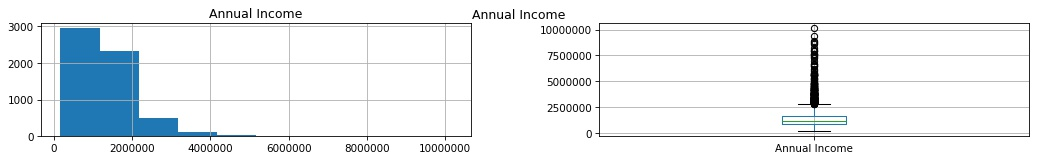

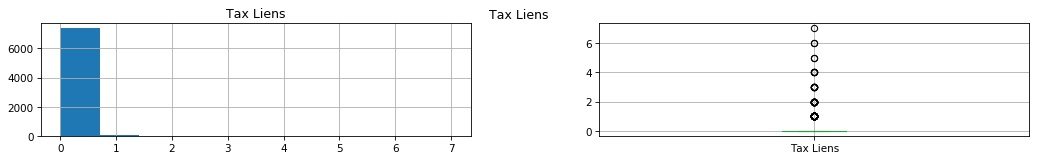

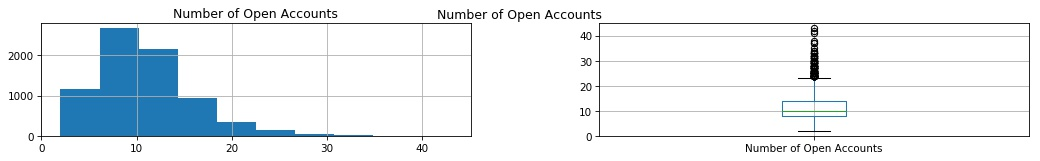

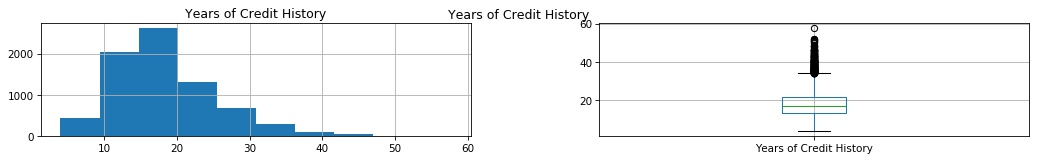

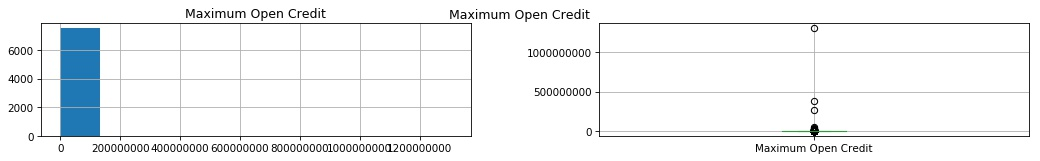

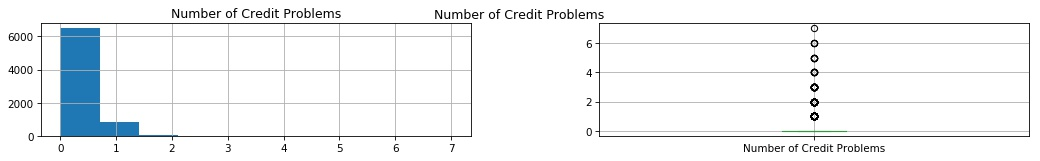

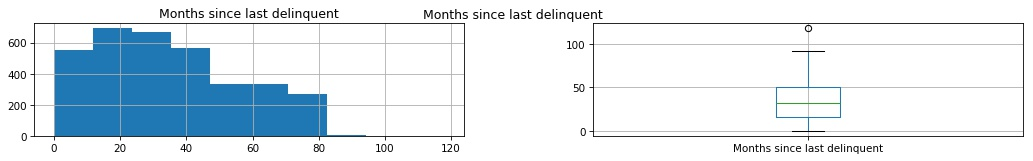

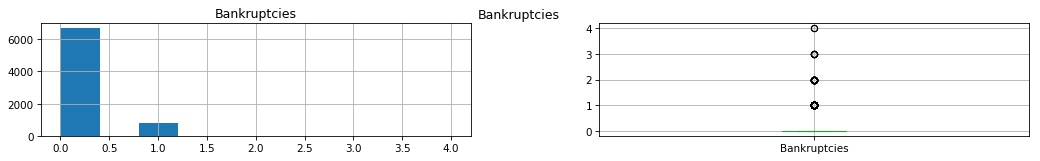

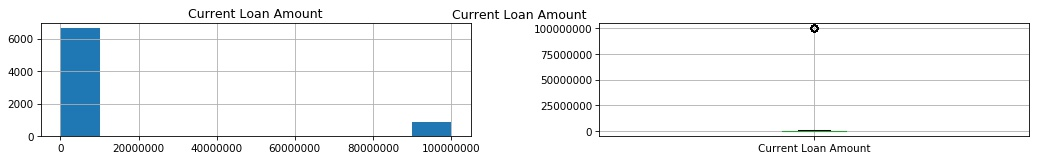

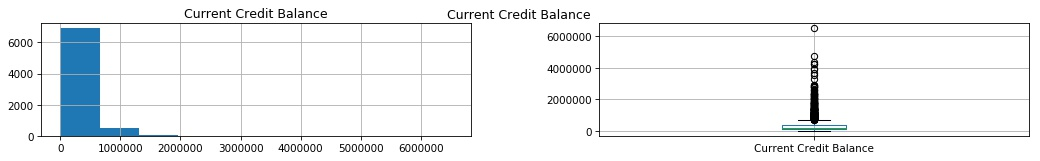

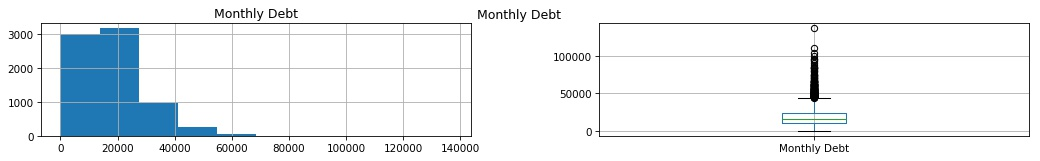

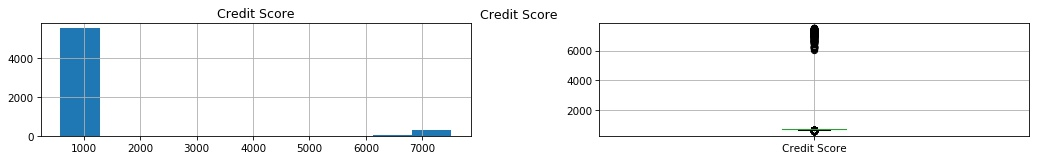

In [31]:
for col in reg_cols:
    draw_reg_col(df_train, col)

Выбросам подвержены следующие признаки:
* Maximum Open Credit
* Current Loan Amount
* Credit Score

**Maximum Open Credit**

In [32]:
df_train[df_train['Maximum Open Credit'] > 50000000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Years in current job (cast),Term (cast),Home Ownership: Have Mortgage,Home Ownership: Home Mortgage,Home Ownership: Own Home,Home Ownership: Rent,Purpose: business loan,Purpose: buy a car,Purpose: buy house,Purpose: debt consolidation,Purpose: educational expenses,Purpose: home improvements,Purpose: major purchase,Purpose: medical bills,Purpose: moving,Purpose: other,Purpose: renewable energy,Purpose: small business,Purpose: take a trip,Purpose: vacation,Purpose: wedding
44,Have Mortgage,1334256.0,10+ years,0.0,17.0,15.4,3.800523e+08,1.0,35.0,0.0,take a trip,Short Term,33110.0,656450.0,34357.0,729.0,0,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
617,Home Mortgage,NaN,3 years,0.0,13.0,27.5,1.304726e+09,0.0,NaN,0.0,debt consolidation,Short Term,529892.0,1126814.0,5492.0,NaN,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2023,Rent,1342825.0,10+ years,0.0,12.0,16.3,5.756256e+07,0.0,NaN,0.0,other,Short Term,166826.0,944547.0,9176.0,749.0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2617,Home Mortgage,3217802.0,10+ years,0.0,12.0,35.5,2.655129e+08,0.0,NaN,0.0,other,Short Term,50116.0,1834450.0,20272.0,750.0,0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
def fix_moc(df):
    def cast(value):
        if value > 100000000:
            return value / 100
        if value > 50000000:
            return value / 10
        else:
            return value

    result = df.copy()
    result['Maximum Open Credit (fix)'] = df['Maximum Open Credit'].apply(cast)    
    return result

In [34]:
pipeline.append(fix_moc)

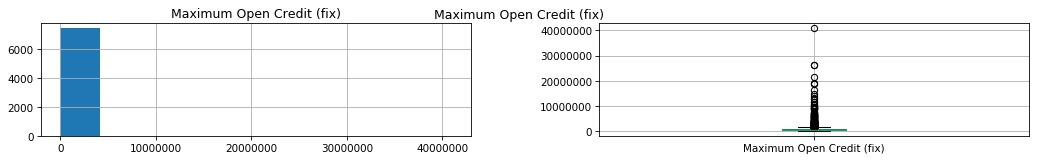

In [35]:
df_train = fix_moc(df_train)
draw_reg_col(df_train, 'Maximum Open Credit (fix)')

**Current Loan Amount**

In [36]:
df_train[df_train['Current Loan Amount'] > 10000000]['Current Loan Amount'].value_counts()

99999999.0    870
Name: Current Loan Amount, dtype: int64

In [37]:
def fix_cla(df):
    def cast(cla, moc):
        if cla > 10000000:
            return moc
        else:
            return cla

    result = df.copy()
    result['Current Loan Amount (fix)'] = df['Current Loan Amount'].combine(df['Maximum Open Credit'], func=cast)
    return result

In [38]:
pipeline.append(fix_cla)

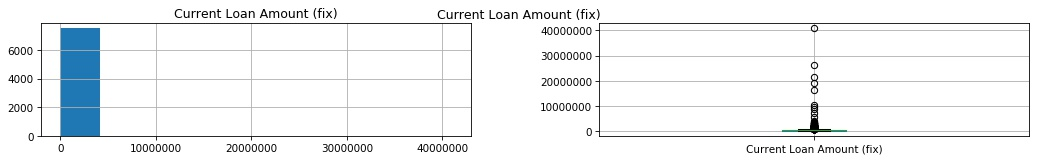

In [39]:
df_train = fix_cla(df_train)
draw_reg_col(df_train, 'Current Loan Amount (fix)')

**Credit Score**

In [40]:
df_train[df_train['Credit Score'] > 1000]['Credit Score'].describe()

count     400.00000
mean     7115.10000
std       306.74537
min      6060.00000
25%      6987.50000
50%      7190.00000
75%      7340.00000
max      7510.00000
Name: Credit Score, dtype: float64

In [41]:
def fix_cs(df):
    def cast(value):
        if value > 1000:
            return value / 10
        else:
            return value

    result = df.copy()
    result['Credit Score (fix)'] = df['Credit Score'].apply(cast)    
    return result

In [42]:
pipeline.append(fix_cs)

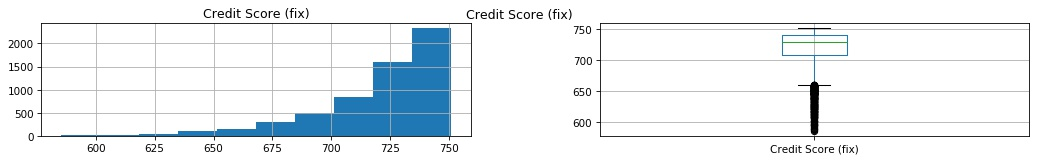

In [43]:
df_train = fix_cs(df_train)
draw_reg_col(df_train, 'Credit Score (fix)')

- - -
## Обработка пропусков<a class="anchor" id="gaps"></a>

In [44]:
len(df_train) - df_train.count()

Home Ownership                      0
Annual Income                    1557
Years in current job              371
Tax Liens                           0
Number of Open Accounts             0
Years of Credit History             0
Maximum Open Credit                 0
Number of Credit Problems           0
Months since last delinquent     4081
Bankruptcies                       14
Purpose                             0
Term                                0
Current Loan Amount                 0
Current Credit Balance              0
Monthly Debt                        0
Credit Score                     1557
Credit Default                      0
Years in current job (cast)         0
Term (cast)                         0
Home Ownership: Have Mortgage       0
Home Ownership: Home Mortgage       0
Home Ownership: Own Home            0
Home Ownership: Rent                0
Purpose: business loan              0
Purpose: buy a car                  0
Purpose: buy house                  0
Purpose: deb

**Annual Income**

In [45]:
def fill_ai(df):
    result = df.copy()
    median = df['Annual Income'].median()
    result['Annual Income (fill)'] = df['Annual Income'].fillna(median)    
    return result

In [46]:
pipeline.append(fill_ai)

In [47]:
df_train = fill_ai(df_train)
len(df_train) - df_train[['Annual Income', 'Annual Income (fill)']].count()

Annual Income           1557
Annual Income (fill)       0
dtype: int64

**Months since last delinquent**

In [48]:
def fill_msld(df):
    result = df.copy()
    median = df['Months since last delinquent'].median()
    result['Months since last delinquent (fill)'] = df['Months since last delinquent'].fillna(median)
    return result

In [49]:
pipeline.append(fill_msld)

In [50]:
df_train = fill_msld(df_train)
len(df_train) - df_train[['Months since last delinquent', 'Months since last delinquent (fill)']].count()

Months since last delinquent           4081
Months since last delinquent (fill)       0
dtype: int64

**Credit Score (fix)**

In [51]:
def fill_cs_fix(df):
    result = df.copy()
    median = df['Credit Score (fix)'].median()
    result['Credit Score (fix_fill)'] = df['Credit Score (fix)'].fillna(median)
    return result

In [52]:
pipeline.append(fill_cs_fix)

In [53]:
df_train = fill_cs_fix(df_train)
len(df_train) - df_train[['Credit Score (fix)', 'Credit Score (fix_fill)']].count()

Credit Score (fix)         1557
Credit Score (fix_fill)       0
dtype: int64

- - - 
## Анализ данных<a class="anchor" id="analysis"></a>

- - - 
## Отбор признаков<a class="anchor" id="feature_selection"></a>

- - - 
## Балансировка классов<a class="anchor" id="balancing"></a>

- - - 
## Подбор моделей, получение бейзлана<a class="anchor" id="model_selection"></a>

- - - 
## Выбор наилучшей модели, настройка гиперпараметров<a class="anchor" id="hyper"></a>

- - - 
## Проверка качества, борьба с переобучением<a class="anchor" id="overfittig"></a>

- - -
## Интерпретация результатов<a class="anchor" id="interpretation"></a>